In [1]:
import pandas as pd
import numpy as np
from operator import itemgetter
import math

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import AffinityPropagation
from sklearn.preprocessing import StandardScaler

import json
import os

In [2]:
#Centroid based
#K-Means - Ok
#K-medoids - descartado
#Fuzzy C means - 
#AffintyPropagation

#Other clustering algorithms:
#DBSCAN
#HDBSCAN
#Self Organizing Maps
#BIRCH


In [3]:
def distancia_euc(lat1, lon1, lat2, lon2):
    p = math.pi/180
    a = 0.5 - math.cos((lat2-lat1)*p)/2 + math.cos(lat1*p) * math.cos(lat2*p) * (1-math.cos((lon2-lon1)*p))/2
    d = 12742 * math.asin(math.sqrt(a))
    return  d

In [4]:
def affinityp_clusters_radios(X):
    
    #Crear copia de base de datos y obtener coordenadas
    data_delitos_affinityp = X.copy()
    
    #Instanciar modelo y alimentar datos
    affinityp = AffinityPropagation()
    y_affinityp = affinityp.fit_predict(X)
    
    #Añadir labels a dataframe
    data_delitos_affinity['affinity_labels'] = affinity.labels_
    
    #Obtener centroides y radios.
    centroide_cluster = dict()
    max_vector_cluster = dict()

    for cluster in list(set(affinityp.labels_)):

        centroide_cluster[cluster]=list(zip(affinityp.cluster_centers_[:, 0],affinityp.cluster_centers_[:,1]))[cluster]

        vector_list = []
        for i in zip(data_delitos_affinityp[data_delitos_affinityp['affinityp_labels']==cluster].loc[:,'longitud'],data_delitos_affinityp[data_delitos_affinityp['affinityp_labels']==cluster].loc[:,'latitud']):
                vector_list.append((i,np.linalg.norm(np.subtract(i,centroide_cluster[cluster]))))
        max_vector_cluster[cluster] = max(vector_list, key=itemgetter(1))[0]
    
    #Obtener max radios
    radio_clusters = dict()
    radio_clusters = [distancia_euc(centroide_cluster[i][1],centroide_cluster[i][0],max_vector_cluster[i][1],max_vector_cluster[i][0]) for i in set(affinityp.labels_)]
    
    
    return len(np.unique(affinityp.labels_)),max(radio_clusters), data_delitos_affinityp, radio_clusters, centroide_cluster

In [5]:
# Importa base de datos
data_delitos = pd.read_csv('data_limpia.csv')
data_delitos.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
X = data_delitos.loc[:,['longitud','latitud']]

In [7]:
#Ejecutar la clusterización para el rango de número clústeres elegido.
resultados = dict()
radios = dict()
centroides = dict()
for i in range(190,200,10):
    clusters, radio, data_delitos_affinityp, radio_clusters, centroide_cluster = affinityp_clusters_radios(X)
    resultados[clusters]=radio
    data_delitos_affinityp.to_csv(f'data_delitos_affinity{i}.csv')
    radios[clusters] = radio_clusters
    centroides[clusters] = centroide_cluster


MemoryError: Unable to allocate 3.10 TiB for an array with shape (652556, 652556) and data type float64

In [ ]:
radios

In [ ]:
centroides2 = dict()
for i in centroides:
  centroides2[int(i)] = {int(k):v for k,v in centroides[i].items()}

In [ ]:
centroides2

In [ ]:
with open('radios_clusters_kmeans.json','w') as outfile:
  json.dump(radios, outfile)

In [ ]:
with open('centroides_clusters_kmeans.json','w') as outfile:
  json.dump(centroides2, outfile)

In [ ]:
centroides_json = open('/content/drive/MyDrive/Proyecto Final IronHack/Primer experimento kmeans/centroides_clusters_kmeans.json')
radios_json = open('/content/drive/MyDrive/Proyecto Final IronHack/Primer experimento kmeans/radios_clusters_kmeans.json')

centroides = json.load(centroides_json)
radios = json.load(radios_json)

In [ ]:
radios

{'100': [2.0017582355929044,
  1.656965864680796,
  1.7449794215471786,
  1.9625753963463628,
  2.6706367447972394,
  3.3632428439495414,
  2.6874124526318797,
  2.5027693109604017,
  2.1548152814238435,
  2.0397060443425707,
  2.5148379863683292,
  2.1775549461902175,
  1.5538046146985491,
  1.9531191577372358,
  1.6637638947362645,
  1.903072107331,
  3.8926568805244104,
  3.991132891730779,
  2.0187991914109484,
  2.0054119070137775,
  2.1381186199385325,
  3.6309520577251733,
  2.2002688262563517,
  2.6274837384212515,
  2.6228710167673537,
  1.7115176876944442,
  1.5755785063045302,
  1.5166617020097517,
  2.1317123744905873,
  2.8194634390952444,
  1.7697744193942448,
  2.0620553605827165,
  2.242233553614428,
  2.013501077733628,
  7.977336988850106,
  2.1556586073134865,
  1.5346302415049715,
  1.5715082210921316,
  2.6229056856044966,
  1.9125451488243568,
  2.092656490293876,
  3.0390990724157656,
  3.6166872543703317,
  1.9144763772544529,
  1.9270030359845431,
  1.369523673

In [ ]:
#Calcular el radio máximo al 95% de significancia.
resultados = dict()
for n_k in radios:
  perc_95 = np.percentile(radios[n_k],95)
  radio_max = 0
  for radio in radios[n_k]:
    if radio <= perc_95 and radio > radio_max:
        radio_max = radio
  resultados[n_k]= radio_max

In [ ]:
resultados

{'100': 3.8926568805244104,
 '110': 3.827805724685057,
 '120': 3.3749640923597273,
 '130': 3.114691026751155,
 '140': 2.8672275794989677,
 '150': 2.6548622683895755,
 '160': 2.6696816320275154,
 '170': 2.6858396673293012,
 '180': 2.5316090936554905,
 '190': 2.4383960631413597,
 '200': 2.426451910401496,
 '50': 6.030953569991626,
 '60': 5.891909275997929,
 '70': 4.186632238977627,
 '80': 4.05512294470669,
 '90': 4.048050716103908}

In [ ]:
resultados_tiempos = {k:(v/61.2)*3600 for k,v in resultados.items()}

In [ ]:
resultados_tiempos

{'100': 228.9798165014359,
 '110': 225.16504262853275,
 '120': 198.52729955057217,
 '130': 183.21711922065617,
 '140': 168.66044585288046,
 '150': 156.16836872879855,
 '160': 157.04009600161856,
 '170': 157.99056866642948,
 '180': 148.91818197973473,
 '190': 143.43506253772705,
 '200': 142.73246531773506,
 '50': 354.7619747053897,
 '60': 346.58289858811344,
 '70': 246.27248464574276,
 '80': 238.53664380627583,
 '90': 238.12063035905337}

Text(0, 0.5, 'Tiempo de respuesta máximo (segundos)')

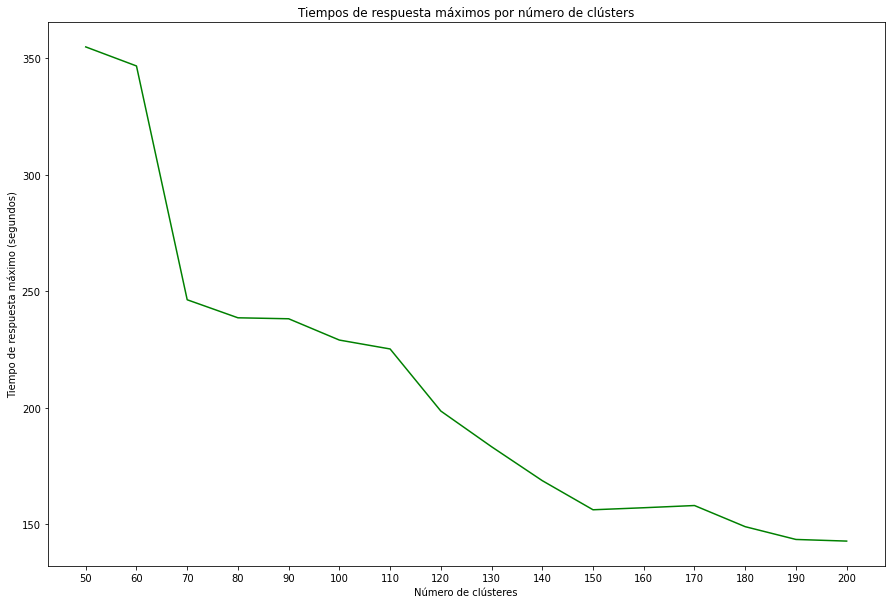

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(list(resultados_tiempos.keys()),list(resultados_tiempos.values()),color='green')
plt.title('Tiempos de respuesta máximos por número de clústers')
plt.xlabel('Número de clústeres')
plt.ylabel('Tiempo de respuesta máximo (segundos)')

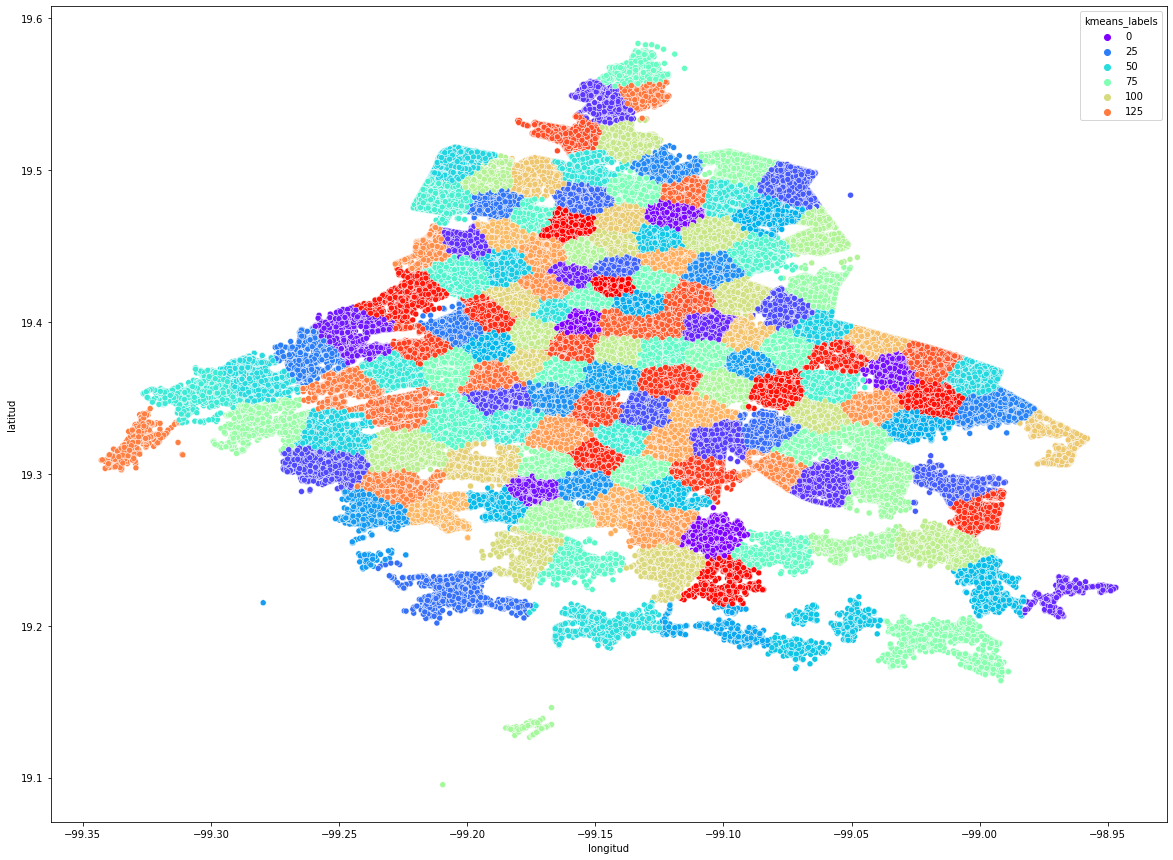

In [ ]:
# Imprime representación clusters
data_delitos_k150 = pd.read_csv('/content/drive/MyDrive/Proyecto Final IronHack/Primer experimento kmeans/data_delitos_k150.csv')
plt.figure(figsize=(20, 15))
sns.scatterplot(data=data_delitos_k150,x='longitud', y='latitud', hue='kmeans_labels', palette='rainbow')

In [ ]:
# #Estandariza los valores de latitud y longitud
# X = data_delitos.loc[:,['longitud','latitud']]
# scaler = StandardScaler()
# delitos_scale = scaler.fit_transform(X)
# data_delitos_scale = pd.DataFrame(delitos_scale)
